# Part 1(a)

Submitted by: Niv S 0895 

Email: niv.saban@gmail.com

Dataset: Titanic

Objective: To classify Titanic passengers as survived or not survived based on their personal attributes.

# Part 1(b)
AI agent that used - Chat-GPT & Gemini

"Create a bar chart for survival rates by gender, a histogram for the age distribution of survivors, and a scatter plot showing the relationship between SibSp and Parch for survivors."

"Normalize the Age and Fare columns in the dataset."

"Write the code for KNN and Decision Tree algorithms, including a GridSearchCV to tune at least two relevant hyperparameters for each algorithm."

"Compare the performance of the algorithms with and without data normalization."

"Create a visualization of the models' performance as a function of the feature selection results."

"Display the results in a table showing the individual scores for each of the 5 cross-validation folds, along with the mean score for each permutation."

"Generate a classification report for the final model on the test set, displaying precision, recall, and F1 scores for each class in a clear tabular format."

"Predict on the independent test set, display the first 5 predictions vs. true labels, plot the confusion matrix, and evaluate model stability with 5-fold F1-macro cross-validation."

# ◊ë◊¢◊ô◊ô◊™ ◊î◊ú◊û◊ô◊ì◊î ◊ï◊îdataSet

◊ë◊¢◊ô◊ô◊™ ◊î◊ú◊û◊ô◊ì◊î ◊î◊ô◊ê ◊û◊©◊ô◊û◊™ ◊°◊ô◊ï◊ï◊í ◊ë◊ô◊†◊ê◊®◊ô ◊©◊û◊ò◊®◊™◊î ◊ú◊ó◊ñ◊ï◊™ ◊î◊ê◊ù ◊†◊ï◊°◊¢ ◊¢◊ú ◊°◊§◊ô◊†◊™ ◊î◊ò◊ô◊ò◊ê◊†◊ô◊ß ◊©◊®◊ì ◊ê◊™ ◊î◊ê◊°◊ï◊ü (◊¢◊®◊ö 1) ◊ê◊ï ◊ú◊ê (◊¢◊®◊ö 0). ◊°◊ò ◊î◊†◊™◊ï◊†◊ô◊ù (dataset) ◊û◊°◊§◊ß ◊û◊ô◊ì◊¢ ◊ì◊û◊ï◊í◊®◊§◊ô ◊ï◊§◊®◊ò◊ô ◊†◊°◊ô◊¢◊î ◊¢◊ú ◊î◊†◊ï◊°◊¢◊ô◊ù, ◊î◊õ◊ï◊ú◊ú ◊û◊ê◊§◊ô◊ô◊†◊ô◊ù ◊û◊®◊õ◊ñ◊ô◊ô◊ù ◊õ◊û◊ï ◊û◊ô◊ü, ◊í◊ô◊ú, ◊û◊ó◊ú◊ß◊™ ◊î◊†◊°◊ô◊¢◊î (Pclass), ◊û◊°◊§◊® ◊ë◊†◊ô ◊î◊û◊©◊§◊ó◊î ◊¢◊ú ◊î◊°◊ô◊§◊ï◊ü (SibSp, Parch), ◊ï◊î◊û◊ó◊ô◊® ◊©◊©◊ï◊ú◊ù ◊¢◊ë◊ï◊® ◊î◊õ◊®◊ò◊ô◊° (Fare). ◊ë◊ê◊û◊¶◊¢◊ï◊™ ◊û◊ê◊§◊ô◊ô◊†◊ô◊ù ◊ê◊ú◊ï, ◊î◊û◊ò◊®◊î ◊î◊ô◊ê ◊ú◊ê◊û◊ü ◊û◊ï◊ì◊ú ◊ó◊ô◊ñ◊ï◊ô ◊©◊ô◊ï◊õ◊ú ◊ú◊î◊õ◊ú◊ô◊ú ◊ï◊ú◊°◊ï◊ï◊í ◊ë◊ê◊ï◊§◊ü ◊û◊ì◊ï◊ô◊ß ◊ê◊™ ◊™◊ï◊¶◊ê◊™ ◊î◊î◊ô◊©◊®◊ì◊ï◊™ ◊¢◊ë◊ï◊® ◊†◊ï◊°◊¢◊ô◊ù ◊©◊ò◊®◊ù ◊†◊®◊ê◊ï.

# ◊ó◊ú◊ß 2 - ◊î◊õ◊†◊î, ◊ò◊¢◊ô◊†◊î, EDA:

◊ò◊¢◊ô◊†◊™ ◊°◊§◊®◊ô◊ï◊™ ◊ï◊ß◊®◊ô◊ê◊™ ◊û◊¢◊®◊õ◊ô ◊î◊†◊™◊ï◊†◊ô◊ù ◊©◊ú ◊î÷ætrain ◊ï◊î÷ætest:


In [119]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import classification_report, f1_score

In [120]:
train_df = pd.read_csv("titanic_train.csv")
test_df =  pd.read_csv("titanic_test.csv")

print("Head of - titanic_train.csv")
display(train_df.head())
print("Head of - titanic_test.csv")
display(test_df.head())

Head of - titanic_train.csv


Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  Survived
0       1    0  54.0      1      0  78.2667         1         1
1       2    0  45.0      0      0  13.5000         0         1
2       3    1  20.0      0      0   9.5000         0         0
3       3    1  36.0      0      0   7.8958         0         0
4       3    1  22.0      0      0   8.0500         0         0

Head of - titanic_test.csv


Pclass  Sex        Age  SibSp  Parch     Fare  Embarked  Survived
0       3    1  35.000000      0      0   7.0500         0         0
1       3    1  30.000000      0      0   7.2500         0         0
2       3    1  29.699118      0      0  14.5000         0         0
3       3    0  21.000000      0      0   7.7500         2         0
4       3    1  32.000000      0      0  56.4958         0         1

**◊ï◊ô◊ñ◊ï◊ê◊ú◊ô◊ñ◊¶◊ô◊î 1: ◊°◊ò◊ò◊ô◊°◊ò◊ô◊ß◊î ◊™◊ô◊ê◊ï◊®◊ô◊™ ◊¢◊ë◊ï◊® ◊î◊©◊ï◊®◊ì◊ô◊ù**

**◊™◊ï◊¢◊ú◊™:** ◊û◊°◊§◊ß◊™ ◊™◊ï◊ë◊†◊ï◊™ ◊°◊ò◊ò◊ô◊°◊ò◊ô◊ï◊™ (◊û◊û◊ï◊¶◊¢, ◊°◊ò◊ô◊ô◊™ ◊™◊ß◊ü, ◊®◊ë◊¢◊ï◊†◊ô◊ù) ◊¢◊ú ◊î◊©◊ï◊®◊ì◊ô◊ù ◊ë◊ú◊ë◊ì. ◊ñ◊î ◊¢◊ï◊ñ◊® ◊ú◊†◊ï ◊ú◊î◊ë◊ô◊ü ◊ê◊™ ◊í◊ô◊ú◊ù ◊î◊ò◊ô◊§◊ï◊°◊ô, ◊û◊ó◊ô◊® ◊î◊õ◊®◊ò◊ô◊° ◊©◊©◊ô◊ú◊û◊ï, ◊ï◊™◊õ◊ï◊†◊ï◊™ ◊î◊ß◊©◊ï◊®◊ï◊™ ◊ú◊û◊©◊§◊ó◊î.


In [91]:
survived_df = train_df[train_df["Survived"] == 1]
survived_df.describe(include="all")

Pclass         Sex         Age       SibSp       Parch        Fare    Embarked  Survived
count  281.000000  281.000000  281.000000  281.000000  281.000000  281.000000  281.000000     281.0
mean     1.957295    0.313167   28.344165    0.487544    0.459075   48.683468    0.451957       1.0
std      0.873187    0.464609   13.552237    0.717651    0.778688   68.767186    0.664405       0.0
min      1.000000    0.000000    0.670000    0.000000    0.000000    0.000000    0.000000       1.0
25%      1.000000    0.000000   22.000000    0.000000    0.000000   12.475000    0.000000       1.0
50%      2.000000    0.000000   29.699118    0.000000    0.000000   26.000000    0.000000       1.0
75%      3.000000    1.000000   35.000000    1.000000    1.000000   57.000000    1.000000       1.0
max      3.000000    1.000000   80.000000    4.000000    5.000000  512.329200    3.000000       1.0

**◊ï◊ô◊ñ◊ï◊ê◊ú◊ô◊ñ◊¶◊ô◊î 2: ◊™◊®◊©◊ô◊ù ◊¢◊û◊ï◊ì◊ï◊™ ◊©◊ú ◊©◊ô◊¢◊ï◊®◊ô ◊î◊©◊®◊ô◊ì◊ï◊™ ◊ú◊§◊ô ◊û◊í◊ì◊®**

**◊™◊ï◊¢◊ú◊™:** ◊û◊ê◊§◊©◊® ◊î◊©◊ï◊ï◊ê◊î ◊ï◊ô◊ñ◊ï◊ê◊ú◊ô◊™ ◊§◊©◊ï◊ò◊î ◊©◊ú ◊©◊ô◊¢◊ï◊®◊ô ◊î◊©◊®◊ô◊ì◊ï◊™ ◊ë◊ô◊ü ◊í◊ë◊®◊ô◊ù ◊ú◊†◊©◊ô◊ù, ◊ï◊û◊ì◊í◊ô◊© ◊ì◊§◊ï◊°◊ô◊ù ◊ë◊®◊ï◊®◊ô◊ù.


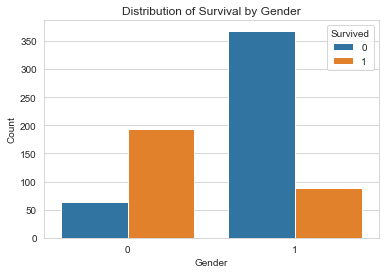

In [92]:
sns.countplot(x="Sex", hue="Survived", data=train_df)
plt.title("Distribution of Survival by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

**◊ï◊ô◊ñ◊ï◊ê◊ú◊ô◊ñ◊¶◊ô◊î 3: ◊î◊™◊§◊ú◊í◊ï◊™ ◊í◊ô◊ú ◊ê◊¶◊ú ◊î◊©◊ï◊®◊ì◊ô◊ù**

**◊™◊ï◊¢◊ú◊™:** ◊û◊®◊ê◊î ◊î◊ê◊ù ◊í◊ô◊ú◊ê◊ô◊ù ◊¶◊¢◊ô◊®◊ô◊ù ◊ê◊ï ◊û◊ë◊ï◊í◊®◊ô◊ù ◊†◊ò◊ï ◊ú◊©◊®◊ï◊ì ◊ô◊ï◊™◊®, ◊ï◊û◊ì◊í◊ô◊© ◊ß◊ë◊ï◊¶◊ï◊™ ◊°◊ô◊õ◊ï◊ü ◊û◊ï◊ú ◊ß◊ë◊ï◊¶◊ï◊™ ◊û◊ï◊í◊†◊ï◊™



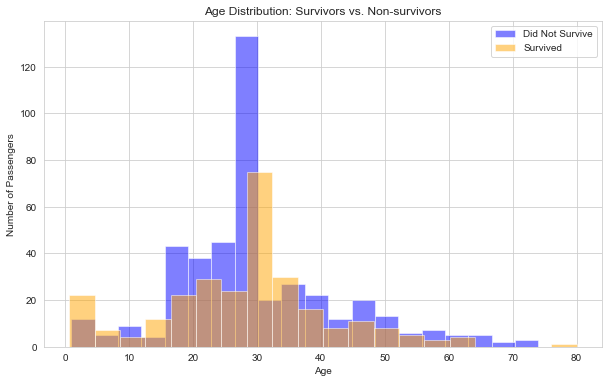

In [93]:
# ◊ô◊¶◊ô◊®◊™ ◊í◊®◊£
plt.figure(figsize=(10, 6))

# ◊î◊™◊§◊ú◊í◊ï◊™ ◊í◊ô◊ú◊ê◊ô◊ù ◊©◊ú ◊û◊ô ◊©◊ú◊ê ◊©◊®◊ì◊ï (Survived == 0)
train_df[train_df['Survived'] == 0]['Age'].dropna().plot(kind='hist', bins=20, alpha=0.5, label='Did Not Survive', color='blue')

# ◊î◊™◊§◊ú◊í◊ï◊™ ◊í◊ô◊ú◊ê◊ô◊ù ◊©◊ú ◊û◊ô ◊©◊©◊®◊ì◊ï (Survived == 1)
train_df[train_df['Survived'] == 1]['Age'].dropna().plot(kind='hist', bins=20, alpha=0.5, label='Survived', color='orange')

plt.title("Age Distribution: Survivors vs. Non-survivors")
plt.xlabel("Age")
plt.ylabel("Number of Passengers")
plt.legend()
plt.show()

**◊ï◊ô◊ñ◊ï◊ê◊ú◊ô◊ñ◊¶◊ô◊î 4: ◊ß◊©◊® ◊ë◊ô◊ü SibSp ◊ú÷æParch ◊ê◊¶◊ú ◊î◊©◊ï◊®◊ì◊ô◊ù**

**◊™◊ï◊¢◊ú◊™:** ◊û◊ê◊§◊©◊® ◊ú◊î◊ë◊ô◊ü ◊ê◊™ ◊î◊©◊§◊¢◊™ ◊û◊ë◊†◊î ◊î◊û◊©◊§◊ó◊î ◊¢◊ú ◊î◊©◊®◊ô◊ì◊ï◊™, ◊ï◊ë◊§◊®◊ò ◊ê◊ù ◊ú◊û◊©◊§◊ó◊ï◊™ ◊û◊°◊ï◊í ◊û◊°◊ï◊ô◊ô◊ù ◊î◊ô◊î ◊°◊ô◊õ◊ï◊ô ◊ò◊ï◊ë ◊ô◊ï◊™◊® ◊ú◊©◊®◊ï◊ì.

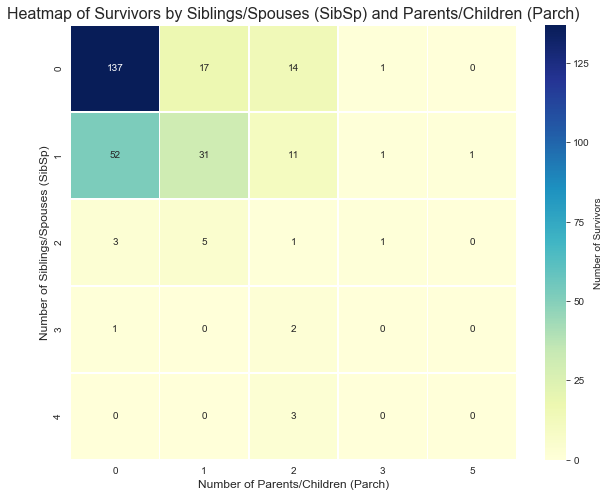

In [94]:

survivors_df = train_df[train_df['Survived'] == 1]

survivor_family_crosstab = pd.crosstab(survivors_df['SibSp'], survivors_df['Parch'])

plt.figure(figsize=(10, 8))

sns.heatmap(survivor_family_crosstab,
            annot=True,     # Show the numerical values on the map
            fmt='d',        # Format the numbers as integers
            cmap='YlGnBu',  # Choose a color palette
            linewidths=.5,  # Add lines between cells for better separation
            cbar_kws={'label': 'Number of Survivors'}) # Label the color bar

plt.title('Heatmap of Survivors by Siblings/Spouses (SibSp) and Parents/Children (Parch)', fontsize=16)
plt.xlabel('Number of Parents/Children (Parch)', fontsize=12)
plt.ylabel('Number of Siblings/Spouses (SibSp)', fontsize=12)

plt.show()

# ◊ó◊ú◊ß 3 ◊î◊†◊ô◊°◊ï◊ô◊ô◊ù:

Feature Engineering

◊™◊î◊ú◊ô◊ö ◊î◊†◊ì◊°◊™ ◊î◊û◊ê◊§◊ô◊ô◊†◊ô◊ù (Feature Engineering) ◊ë◊§◊®◊ï◊ô◊ß◊ò ◊ñ◊î ◊õ◊ú◊ú ◊û◊°◊§◊® ◊©◊ú◊ë◊ô◊ù ◊ß◊®◊ô◊ò◊ô◊ô◊ù ◊ú◊î◊õ◊†◊™ ◊î◊†◊™◊ï◊†◊ô◊ù, ◊ê◊©◊® ◊ë◊ï◊¶◊¢◊ï ◊ë◊ê◊ï◊§◊ü ◊û◊ê◊ï◊®◊í◊ü ◊ë◊ê◊û◊¶◊¢◊ï◊™ ColumnTransformer. ◊®◊ê◊©◊ô◊™, ◊î◊û◊ê◊§◊ô◊ô◊†◊ô◊ù ◊ó◊ï◊ú◊ß◊ï ◊ú◊©◊™◊ô ◊ß◊ë◊ï◊¶◊ï◊™: ◊†◊ï◊û◊®◊ô◊ô◊ù ◊ï◊ß◊ò◊í◊ï◊®◊ô◊ê◊ú◊ô◊ô◊ù. ◊¢◊ú ◊î◊û◊ê◊§◊ô◊ô◊†◊ô◊ù ◊î◊†◊ï◊û◊®◊ô◊ô◊ù (◊õ◊í◊ï◊ü 'Age' ◊ï-'Fare') ◊î◊ï◊§◊¢◊ú ◊†◊ô◊®◊û◊ï◊ú (StandardScaler) ◊¢◊ú ◊û◊†◊™ ◊ú◊î◊ë◊ô◊ê◊ù ◊ú◊°◊ï◊ú◊ù ◊ê◊ó◊ô◊ì, ◊©◊ú◊ë ◊©◊î◊ô◊†◊ï ◊ó◊ô◊ï◊†◊ô ◊ë◊û◊ô◊ï◊ó◊ì ◊¢◊ë◊ï◊® ◊û◊ï◊ì◊ú◊ô◊ù ◊î◊®◊í◊ô◊©◊ô◊ù ◊ú◊û◊®◊ó◊ß◊ô◊ù ◊õ◊û◊ï KNN. ◊ë◊û◊ß◊ë◊ô◊ú, ◊î◊û◊ê◊§◊ô◊ô◊†◊ô◊ù ◊î◊ß◊ò◊í◊ï◊®◊ô◊ê◊ú◊ô◊ô◊ù (◊õ◊í◊ï◊ü 'Pclass' ◊ï-'Sex') ◊¢◊ë◊®◊ï ◊ß◊ô◊ì◊ï◊ì ◊û◊°◊ï◊í OneHotEncoder ◊©◊î◊û◊ô◊® ◊ê◊ï◊™◊ù ◊ú◊ô◊ô◊¶◊ï◊í ◊û◊°◊§◊®◊ô ◊ë◊ô◊†◊ê◊®◊ô

In [96]:
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- ◊©◊ú◊ë 2: ◊ë◊†◊ô◊ô◊™ ◊™◊î◊ú◊ô◊ö ◊¢◊ô◊ë◊ï◊ì ◊î◊†◊™◊ï◊†◊ô◊ù ◊î◊û◊ß◊ì◊ô◊ù (Preprocessor) ---
numeric_features = ['Age', 'SibSp', 'Parch', 'Fare']
categorical_features = ['Pclass', 'Sex', 'Embarked']

numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', numeric_transformer, numeric_features),
        ('categorical', categorical_transformer, categorical_features)
    ])

**◊î◊™◊†◊°◊ï◊™ ◊ë◊û◊ï◊ì◊ú◊ô◊ù**


--- Running SelectKBest for KNN ---


C:\Users\nivsa\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


KNN with SelectKBest - Done.
--- Running SelectKBest for Decision Tree ---
Decision Tree with SelectKBest - Done.

     Feature Selection Results: KNN (Detailed Folds)


Model Num_Features    Fold_1    Fold_2    Fold_3    Fold_4    Fold_5  Mean_Score  Rank
4   KNN            5  0.833442  0.788176  0.777249  0.823429  0.726575    0.789885     1
6   KNN            7  0.791159  0.809556  0.752422  0.821802  0.737209    0.782509     2
7   KNN            8  0.796429  0.785641  0.725301  0.806483  0.764289    0.775648     3
0   KNN            1  0.806483  0.746667  0.775958  0.806483  0.739460    0.775073     4
1   KNN            2  0.806483  0.746667  0.775958  0.806483  0.739460    0.775073     4
8   KNN            9  0.806483  0.752422  0.741497  0.833442  0.729017    0.772649     6
9   KNN           10  0.804842  0.749662  0.709255  0.842015  0.742944    0.769791     7
5   KNN            6  0.799552  0.766154  0.763191  0.821802  0.696848    0.769637     8
3   KNN            4  0.833442  0.805128  0.777249  0.761353  0.649958    0.765629     9
2   KNN            3  0.806483  0.771467  0.675469  0.771396  0.649958    0.735104    10


--- Summary for KNN ---
üèÜ Winning Permutation: Using 5 features.
üìà Best Mean Score: 0.7899

 Feature Selection Results: Decision Tree (Detailed Folds)


Model Num_Features    Fold_1    Fold_2    Fold_3    Fold_4    Fold_5  Mean_Score  Rank
4  Decision Tree            5  0.823429  0.759916  0.782135  0.847645  0.745432    0.791793     1
3  Decision Tree            4  0.823429  0.768919  0.782135  0.790511  0.739460    0.780964     2
5  Decision Tree            6  0.782788  0.759916  0.782135  0.830357  0.745432    0.780187     3
0  Decision Tree            1  0.806483  0.746667  0.775958  0.806483  0.739460    0.775073     4
1  Decision Tree            2  0.806483  0.746667  0.775958  0.806483  0.739460    0.775073     4
2  Decision Tree            3  0.806483  0.754960  0.775958  0.796429  0.739460    0.774720     6
7  Decision Tree            8  0.812544  0.711149  0.765529  0.830357  0.739460    0.771864     7
8  Decision Tree            9  0.802083  0.711149  0.765529  0.838970  0.739460    0.771494     8
6  Decision Tree            7  0.781330  0.711149  0.765529  0.830357  0.745432    0.766797     9
9  Decision Tree           10  0.820076  0.711149  0.717262  0.838970  0.739460    0.765429    10


--- Summary for Decision Tree ---
üèÜ Winning Permutation: Using 5 features.
üìà Best Mean Score: 0.7918

--- Generating Combined Visualization (Based on Mean Score) ---


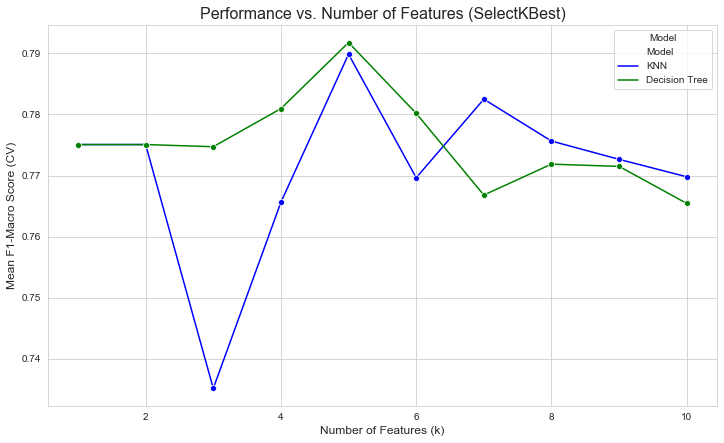

In [97]:
# --- ◊©◊ú◊ë 1: ◊ò◊¢◊ô◊†◊™ ◊î◊†◊™◊ï◊†◊ô◊ù ◊ï◊î◊õ◊†◊™◊ù ---
df = pd.read_csv('titanic_train.csv')
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- ◊©◊ú◊ë 2: ◊ë◊†◊ô◊ô◊™ ◊™◊î◊ú◊ô◊ö ◊¢◊ô◊ë◊ï◊ì ◊î◊†◊™◊ï◊†◊ô◊ù ◊î◊û◊ß◊ì◊ô◊ù (Preprocessor) ---
numeric_features = ['Age', 'SibSp', 'Parch', 'Fare']
categorical_features = ['Pclass', 'Sex', 'Embarked']

numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', numeric_transformer, numeric_features),
        ('categorical', categorical_transformer, categorical_features)
    ])

# --- ◊©◊ú◊ë 3: ◊î◊®◊¶◊™ GridSearch ◊¢◊ù SelectKBest ◊¢◊ë◊ï◊® ◊©◊†◊ô ◊î◊û◊ï◊ì◊ú◊ô◊ù ---

# ◊î◊®◊¶◊î ◊¢◊ë◊ï◊® KNN
print("--- Running SelectKBest for KNN ---")
kbest_pipeline_knn = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selector', SelectKBest(score_func=f_classif)),
    ('classifier', KNeighborsClassifier(n_neighbors=9, weights='uniform'))
])
param_grid_kbest_knn = {'feature_selector__k': range(1, 11)}
grid_search_kbest_knn = GridSearchCV(kbest_pipeline_knn, param_grid_kbest_knn, cv=5, scoring='f1_macro', verbose=0)
grid_search_kbest_knn.fit(X_train, y_train)
print("KNN with SelectKBest - Done.")

# ◊î◊®◊¶◊î ◊¢◊ë◊ï◊® ◊¢◊• ◊î◊ó◊ú◊ò◊î
print("--- Running SelectKBest for Decision Tree ---")
kbest_pipeline_dt = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selector', SelectKBest(score_func=f_classif)),
    ('classifier', DecisionTreeClassifier(max_depth=10, min_samples_leaf=10, random_state=42))
])
param_grid_kbest_dt = {'feature_selector__k': range(1, 11)}
grid_search_kbest_dt = GridSearchCV(kbest_pipeline_dt, param_grid_kbest_dt, cv=5, scoring='f1_macro', verbose=0)
grid_search_kbest_dt.fit(X_train, y_train)
print("Decision Tree with SelectKBest - Done.")


# --- ◊©◊ú◊ë 4: ◊î◊¶◊í◊™ ◊î◊™◊ï◊¶◊ê◊ï◊™ ◊ë◊ò◊ë◊ú◊ê◊ï◊™ ◊†◊§◊®◊ì◊ï◊™ ◊ï◊û◊§◊ï◊®◊ò◊ï◊™ ---
pd.set_option('display.max_rows', 20)
pd.set_option('display.width', 1200)

split_cols = [f'split{i}_test_score' for i in range(5)]

# --- ◊ò◊ë◊ú◊™ KNN ---
print("\n" + "="*80)
print("     Feature Selection Results: KNN (Detailed Folds)")
print("="*80)
results_knn = pd.DataFrame(grid_search_kbest_knn.cv_results_)
# *** ◊õ◊ê◊ü ◊î◊©◊ô◊†◊ï◊ô: ◊î◊ï◊°◊§◊™ mean_test_score ◊ú◊®◊©◊ô◊û◊™ ◊î◊¢◊û◊ï◊ì◊ï◊™ ***
columns_to_show_detailed = ['param_feature_selector__k'] + split_cols + ['mean_test_score', 'rank_test_score']
display_df_knn = results_knn[columns_to_show_detailed]
# *** ◊õ◊ê◊ü ◊î◊©◊ô◊†◊ï◊ô: ◊î◊ï◊°◊§◊™ Mean_Score ◊ú◊®◊©◊ô◊û◊™ ◊î◊©◊û◊ï◊™ ***
display_df_knn.columns = ['Num_Features', 'Fold_1', 'Fold_2', 'Fold_3', 'Fold_4', 'Fold_5', 'Mean_Score', 'Rank']
display_df_knn.insert(0, 'Model', 'KNN')
display(display_df_knn.sort_values(by='Rank'))

# ◊°◊ô◊õ◊ï◊ù ◊î◊™◊ï◊¶◊ê◊ï◊™ ◊¢◊ë◊ï◊® KNN
best_k_knn = grid_search_kbest_knn.best_params_['feature_selector__k']
best_mean_score_knn = grid_search_kbest_knn.best_score_
print("\n--- Summary for KNN ---")
print(f"üèÜ Winning Permutation: Using {best_k_knn} features.")
print(f"üìà Best Mean Score: {best_mean_score_knn:.4f}")

# --- ◊ò◊ë◊ú◊™ ◊¢◊• ◊î◊ó◊ú◊ò◊î ---
print("\n" + "="*80)
print(" Feature Selection Results: Decision Tree (Detailed Folds)")
print("="*80)
results_dt = pd.DataFrame(grid_search_kbest_dt.cv_results_)
display_df_dt = results_dt[columns_to_show_detailed]
display_df_dt.columns = ['Num_Features', 'Fold_1', 'Fold_2', 'Fold_3', 'Fold_4', 'Fold_5', 'Mean_Score', 'Rank']
display_df_dt.insert(0, 'Model', 'Decision Tree')
display(display_df_dt.sort_values(by='Rank'))

# ◊°◊ô◊õ◊ï◊ù ◊î◊™◊ï◊¶◊ê◊ï◊™ ◊¢◊ë◊ï◊® ◊¢◊• ◊î◊ó◊ú◊ò◊î
best_k_dt = grid_search_kbest_dt.best_params_['feature_selector__k']
best_mean_score_dt = grid_search_kbest_dt.best_score_
print("\n--- Summary for Decision Tree ---")
print(f"üèÜ Winning Permutation: Using {best_k_dt} features.")
print(f"üìà Best Mean Score: {best_mean_score_dt:.4f}")


# --- ◊©◊ú◊ë 5: ◊î◊¶◊í◊™ ◊ï◊ô◊ñ◊ï◊ê◊ú◊ô◊ñ◊¶◊ô◊î ◊û◊ê◊ï◊ó◊ì◊™ (◊û◊ë◊ï◊°◊°◊™ ◊¢◊ú ◊î◊¶◊ô◊ï◊ü ◊î◊û◊û◊ï◊¶◊¢) ---
print("\n--- Generating Combined Visualization (Based on Mean Score) ---")
# ◊û◊õ◊ô◊ï◊ï◊ü ◊©◊¢◊û◊ï◊ì◊™ ◊î◊û◊û◊ï◊¶◊¢ ◊õ◊ë◊® ◊ß◊ô◊ô◊û◊™, ◊ê◊ô◊ü ◊¶◊ï◊®◊ö ◊ú◊î◊ï◊°◊ô◊£ ◊ê◊ï◊™◊î ◊©◊ï◊ë
combined_display_df = pd.concat([display_df_knn, display_df_dt])
plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")
ax = sns.lineplot(
    data=combined_display_df,
    x='Num_Features',
    y='Mean_Score',
    hue='Model',
    marker='o',
    palette={'KNN': 'blue', 'Decision Tree': 'green'}
)
ax.set_title('Performance vs. Number of Features (SelectKBest)', fontsize=16)
ax.set_xlabel('Number of Features (k)', fontsize=12)
ax.set_ylabel('Mean F1-Macro Score (CV)', fontsize=12)
ax.legend(title='Model')
plt.grid(True)
plt.show()

◊î◊¶◊í◊î ◊ï◊ô◊ñ◊ï◊ê◊ú◊ô◊™ ◊©◊ú ◊î◊ô◊ó◊° ◊ë◊ô◊ü ◊î◊ê◊ú◊ï◊í◊®◊ô◊™◊û◊ô◊ù ◊ú◊§◊†◊ô ◊†◊ô◊®◊û◊ï◊ú ◊î◊†◊™◊ï◊†◊ô◊ù ◊ï◊ú◊ê◊ó◊® ◊û◊õ◊ü

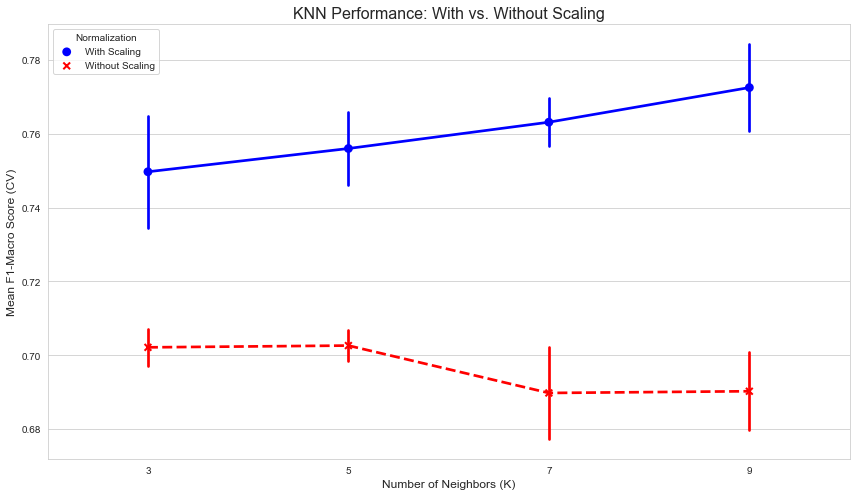

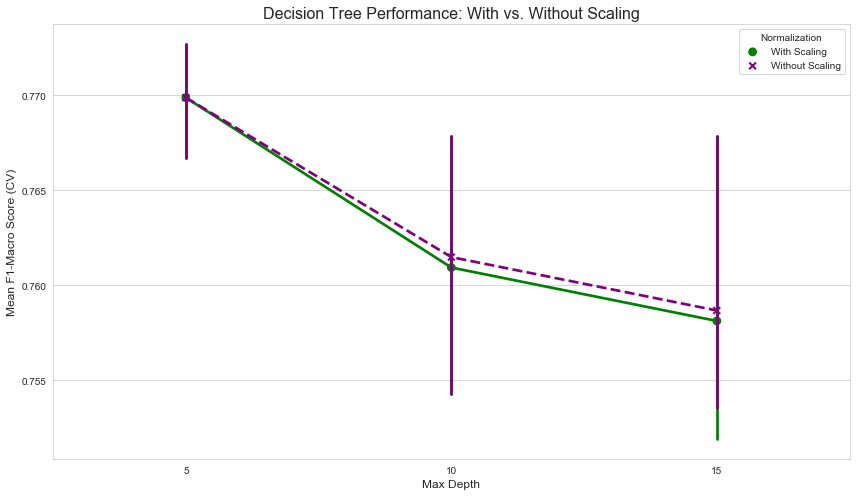

In [98]:
# --- ◊ï◊ô◊ñ◊ï◊ê◊ú◊ô◊ñ◊¶◊ô◊î 2: ◊†◊ô◊™◊ï◊ó ◊î◊©◊§◊¢◊™ ◊î◊†◊ô◊®◊û◊ï◊ú ◊¢◊ú KNN ---
knn_results_df = pd.DataFrame(grid_search_knn.cv_results_)

def clean_scaler_name(scaler):
    if isinstance(scaler, StandardScaler):
        return 'With Scaling'
    return 'Without Scaling'
knn_results_df['Scaler Type'] = knn_results_df['param_preprocessor__numeric__scaler'].apply(clean_scaler_name)

plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")
ax2 = sns.pointplot(data=knn_results_df, x='param_classifier__n_neighbors', y='mean_test_score', hue='Scaler Type', palette={'With Scaling': 'blue', 'Without Scaling': 'red'}, markers=['o', 'x'], linestyles=['-', '--'])
ax2.set_title('KNN Performance: With vs. Without Scaling', fontsize=16)
ax2.set_xlabel('Number of Neighbors (K)', fontsize=12)
ax2.set_ylabel('Mean F1-Macro Score (CV)', fontsize=12)
ax2.legend(title='Normalization')
plt.tight_layout()
plt.show()

# --- ◊ï◊ô◊ñ◊ï◊ê◊ú◊ô◊ñ◊¶◊ô◊î 3: ◊†◊ô◊™◊ï◊ó ◊î◊©◊§◊¢◊™ ◊î◊†◊ô◊®◊û◊ï◊ú ◊¢◊ú ◊¢◊• ◊î◊ó◊ú◊ò◊î ---
dt_results_df = pd.DataFrame(grid_search_dt.cv_results_)
dt_results_df['Scaler Type'] = dt_results_df['param_preprocessor__numeric__scaler'].apply(clean_scaler_name)

plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")
ax3 = sns.pointplot(data=dt_results_df, x='param_classifier__max_depth', y='mean_test_score', hue='Scaler Type', palette={'With Scaling': 'green', 'Without Scaling': 'purple'}, markers=['o', 'x'], linestyles=['-', '--'])
ax3.set_title('Decision Tree Performance: With vs. Without Scaling', fontsize=16)
ax3.set_xlabel('Max Depth', fontsize=12)
ax3.set_ylabel('Mean F1-Macro Score (CV)', fontsize=12)
ax3.legend(title='Normalization')
plt.tight_layout()
plt.show()

◊ë◊ó◊ô◊®◊™ ◊î◊ê◊ú◊í◊ï◊®◊ô◊™◊ù ◊î◊û◊†◊¶◊ó ◊¢◊ù ◊î◊§◊®◊ï◊û◊ò◊¶◊ô◊ï◊™ ◊î◊û◊ï◊¶◊ú◊ó◊ï◊™ ◊ë◊ô◊ï◊™◊®

In [99]:
# --- Step 6: Automatic Comparison and Selection of the Winning Model ---

# Get the best mean score from each run
best_score_knn = grid_search_kbest_knn.best_score_
best_score_dt = grid_search_kbest_dt.best_score_

# Get the optimal number of features from each run
best_k_knn = grid_search_kbest_knn.best_params_['feature_selector__k']
best_k_dt = grid_search_kbest_dt.best_params_['feature_selector__k']

print("="*50)
print("     Final Conclusion & Winning Model")
print("="*50)

# Compare the two models and print the winner
if best_score_knn > best_score_dt:
    print("üèÜ The winning model is: KNN with SelectKBest")
    print(f"   - Best Mean Score: {best_score_knn:.4f}")
    print(f"   - Optimal Number of Features: {best_k_knn}")
elif best_score_dt > best_score_knn:
    print("üèÜ The winning model is: Decision Tree with SelectKBest")
    print(f"   - Best Mean Score: {best_score_dt:.4f}")
    print(f"   - Optimal Number of Features: {best_k_dt}")
else:
    print("üèÜ It's a tie! Both models achieved the same mean score.")
    print(f"   - KNN: Score {best_score_knn:.4f} with {best_k_knn} features.")
    print(f"   - Decision Tree: Score {best_score_dt:.4f} with {best_k_dt} features.")

     Final Conclusion & Winning Model
üèÜ The winning model is: Decision Tree with SelectKBest
   - Best Mean Score: 0.7918
   - Optimal Number of Features: 5


# ◊ó◊ú◊ß 4 ◊ê◊ô◊û◊ï◊ü

◊ú◊ê◊ó◊® ◊©◊í◊ô◊ú◊ô◊†◊ï ◊©◊î◊ê◊ú◊í◊ï◊®◊ô◊™◊ù ◊î◊û◊ï◊¶◊ú◊ó ◊î◊ï◊ê ◊¢◊• ◊î◊î◊ó◊ú◊ò◊î ◊ú◊ú◊ê ◊ô◊¶◊ô◊®◊™ ◊î◊™◊õ◊ï◊†◊î ◊î◊ó◊ì◊©◊î,
◊õ◊¢◊™ ◊†◊ê◊û◊ü ◊ê◊™ ◊î◊û◊ï◊ì◊ú ◊û◊ó◊ì◊© ◊ú◊§◊ô ◊î◊ß◊ï◊û◊ô◊ë◊†◊¶◊ô◊î ◊î◊ñ◊ï

In [85]:
# --- ◊î◊í◊ì◊®◊™ ◊î-Pipeline ◊î◊°◊ï◊§◊ô ◊¢◊ù ◊î◊§◊®◊û◊ò◊®◊ô◊ù ◊î◊û◊†◊¶◊ó◊ô◊ù ---
# ◊î◊§◊®◊û◊ò◊®◊ô◊ù ◊î◊ù ◊ê◊ú◊ï ◊©◊î◊™◊ß◊ë◊ú◊ï ◊û◊î◊î◊®◊¶◊î ◊î◊ß◊ï◊ì◊û◊™: ◊¢◊• ◊î◊ó◊ú◊ò◊î ◊¢◊ù 5 ◊û◊ê◊§◊ô◊ô◊†◊ô◊ù
final_model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selector', SelectKBest(score_func=f_classif, k=5)),
    ('classifier', DecisionTreeClassifier(max_depth=10, min_samples_leaf=10, random_state=42))
])

# --- ◊ê◊ô◊û◊ï◊ü ◊î◊û◊ï◊ì◊ú ◊î◊°◊ï◊§◊ô ◊¢◊ú ◊õ◊ú ◊°◊ò ◊î◊ê◊ô◊û◊ï◊ü (X_train, y_train) ---
print("--- Training the final winning model on the entire training set... ---")
final_model_pipeline.fit(X_train, y_train)

print("\n‚úÖ Done!")
print("The final model is now trained and ready for evaluation on the test set in the next step.")

--- Training the final winning model on the entire training set... ---

‚úÖ Done!
The final model is now trained and ready for evaluation on the test set in the next step.


# ◊ó◊ú◊ß 5 - ◊ó◊ô◊ñ◊ï◊ô ◊ï◊ë◊ì◊ô◊ß◊™ ◊ê◊ô◊õ◊ï◊™

Actual Value  Model Prediction
0             0                 0
1             0                 0
2             0                 0
3             0                 1
4             1                 0


--- Confusion Matrix ---


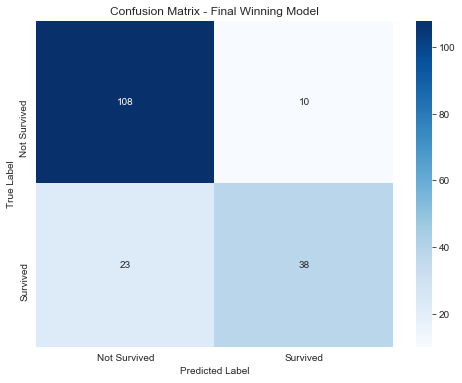


Cross-validation on test_df (5 folds, independent evaluation):
Fold 1: 0.7533
Fold 2: 0.7305
Fold 3: 0.7243
Fold 4: 0.6759
Fold 5: 0.8600

Mean F1 Score across 5 folds (test_df): 0.7488


In [118]:
X_test_final = test_df.drop('Survived', axis=1)
y_test_final = test_df['Survived']

# ◊ó◊ô◊ñ◊ï◊ô ◊¢◊ú ◊°◊ò ◊î◊û◊ë◊ó◊ü
y_pred_final = final_model_pipeline.predict(X_test_final)

comparison_df_head = pd.DataFrame({
    'Actual Value': y_test_final.head(5).values,
    'Model Prediction': y_pred_final[:5]
})
display(comparison_df_head)

# --- ◊©◊ú◊ë 2: ◊û◊ò◊®◊ô◊¶◊™ ◊ë◊ú◊ë◊ï◊ú ---
cm = confusion_matrix(y_test_final, y_pred_final)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Survived', 'Survived'], 
            yticklabels=['Not Survived', 'Survived'])
plt.title("Confusion Matrix - Final Winning Model")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


# --- ◊©◊ú◊ë 5: Cross-validation ◊¢◊¶◊û◊ê◊ô ◊¢◊ú test_df ---
cv_scores_eval = cross_val_score(final_model_pipeline, X_test_final, y_test_final, cv=5, scoring="f1_macro")

print("\nCross-validation on test_df (5 folds, independent evaluation):")
for i, score in enumerate(cv_scores_eval, 1):
    print(f"Fold {i}: {score:.4f}")

print(f"\nMean F1 Score across 5 folds (test_df): {np.mean(cv_scores_eval):.4f}")